In [1]:
import time
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./disease-symptoms-dataset.csv')
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


### Data Cleaning

In [3]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [4]:
df.duplicated().sum()

49

In [6]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.rename(columns = {'Outcome Variable':'Results'},inplace=True)

In [8]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


### Performing EDA

In [9]:
df['Disease'].value_counts().sum()

300

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Difficulty Breathing  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   Blood Pressure        300 non-null    object
 8   Cholesterol Level     300 non-null    object
 9   Results               300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB


In [11]:
df['Age'].mean()

45.75666666666667

<Axes: ylabel='count'>

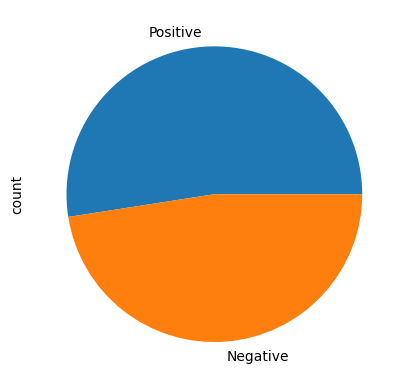

In [12]:
df[df.loc[:,'Age'] > 45]['Results'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

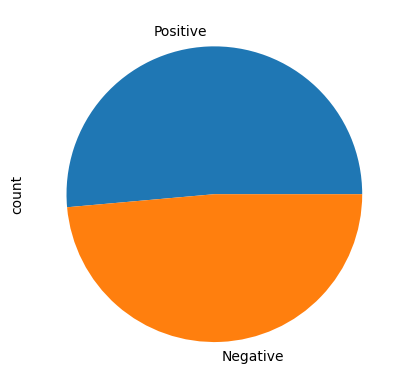

In [13]:
df[df.loc[:,'Age'] < 45]['Results'].value_counts().plot(kind='pie')

In [15]:
import plotly.express as px
fig = px.histogram(df, 
             x = 'Age',  
             title='Age-Disease Distribution',
             color= 'Disease'
                  )
fig.update_layout(bargap=0.2)

fig.show()

In [ ]:
import plotly.graph_objs as go
import plotly.subplots as sp

fig = sp.make_subplots(rows=5, cols=2, subplot_titles=('Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Results'))

for i, col in enumerate(df.columns):
    histogram = go.Histogram(x=df[col], name=col)
    row_num = (i // 2) + 1
    col_num = (i % 2) + 1
    fig.add_trace(histogram, row=row_num, col=col_num)

fig.update_layout(title='Histograms of Disease Dataset', showlegend=False, height=1200, width=800)

fig.update_xaxes(title_text='Value', row=5, col=1)
fig.update_yaxes(title_text='Frequency', row=3, col=1)

fig.show()


## Data Transformation

In [17]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


In [18]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder

In [19]:
encoder1 = OneHotEncoder(sparse_output=False,drop='first')
encoder2 = LabelEncoder()

In [ ]:
df['Disease'] = encoder2.fit_transform(df[['Disease']])
df['Fever'] = encoder1.fit_transform(df[['Fever']])
df['Cough'] =encoder1.fit_transform(df[['Cough']])
df['Fatigue'] = encoder1.fit_transform(df[['Fatigue']])
df['Difficulty Breathing'] =encoder1.fit_transform(df[['Difficulty Breathing']])
df['Gender'] = encoder1.fit_transform(df[['Gender']])
df['Blood Pressure'] = encoder1.fit_transform(df[['Blood Pressure']])
df['Cholesterol Level'] = encoder1.fit_transform(df[['Cholesterol Level']])

In [21]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,56,1.0,0.0,1.0,1.0,19,0.0,1.0,0.0,Positive
1,24,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,Negative
2,37,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,Negative
3,6,1.0,1.0,0.0,1.0,25,1.0,0.0,0.0,Positive
5,37,1.0,0.0,0.0,0.0,25,0.0,0.0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...
341,106,1.0,1.0,1.0,0.0,70,0.0,0.0,0.0,Positive
342,114,0.0,0.0,1.0,0.0,70,0.0,0.0,0.0,Positive
343,101,1.0,0.0,1.0,0.0,80,0.0,0.0,0.0,Positive
345,101,1.0,0.0,1.0,0.0,85,1.0,0.0,0.0,Positive


In [ ]:
df['Results'] = encoder1.fit_transform(df[['Results']])

In [23]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,56,1.0,0.0,1.0,1.0,19,0.0,1.0,0.0,1.0
1,24,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,0.0
2,37,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,0.0
3,6,1.0,1.0,0.0,1.0,25,1.0,0.0,0.0,1.0
5,37,1.0,0.0,0.0,0.0,25,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
341,106,1.0,1.0,1.0,0.0,70,0.0,0.0,0.0,1.0
342,114,0.0,0.0,1.0,0.0,70,0.0,0.0,0.0,1.0
343,101,1.0,0.0,1.0,0.0,80,0.0,0.0,0.0,1.0
345,101,1.0,0.0,1.0,0.0,85,1.0,0.0,0.0,1.0


In [24]:
X = df.drop('Results',axis=1)
Y = df['Results']

In [25]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X = mmc.fit_transform(X)

In [28]:
X

array([[0.48695652, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.20869565, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32173913, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.87826087, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87826087, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.87826087, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
X.shape

(300, 9)

### Model Building

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=25)
models_cost = {}

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=6)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=10)

### Gaussian Naive Bayes

In [36]:
start_time = time.time()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
end_time = time.time()
models_cost['GaussianNB'] = end_time - start_time
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Accuracy Score: 0.6333333333333333
Confusion Matrix: [[ 6 19]
 [ 3 32]]


### Logistic Regression

In [37]:
start_time = time.time()
lrc.fit(X_train,y_train)
y_pred1= lrc.predict(X_test)
end_time = time.time()
models_cost['LogisticRegression'] = end_time - start_time
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7666666666666667
[[19  6]
 [ 8 27]]
0.8181818181818182


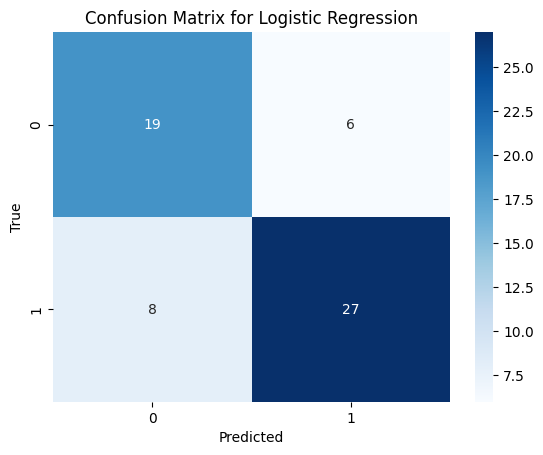

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')

plt.show()

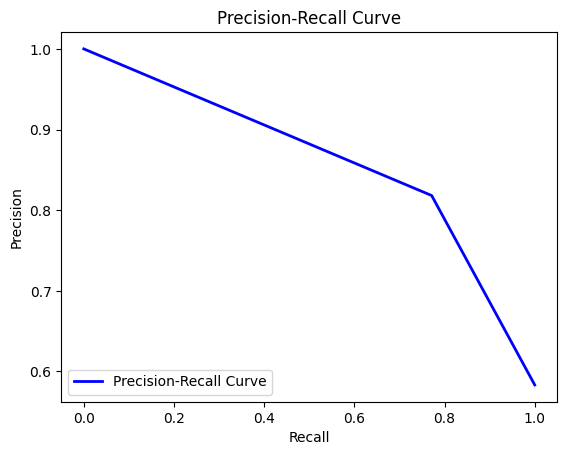

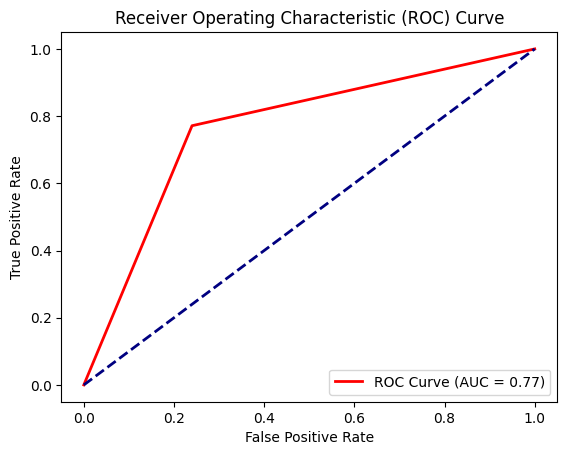

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73        25
         1.0       0.82      0.77      0.79        35

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



In [39]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred1)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred1))


### Decision Tree

In [40]:
start_time = time.time()
dtc.fit(X_train,y_train)
y_pred4= dtc.predict(X_test)
end_time = time.time()
models_cost['DecisionTreeClassifier'] = end_time - start_time
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.6666666666666666
[[18  7]
 [13 22]]
0.7586206896551724


### Random Forest

In [41]:
start_time = time.time()
rfc.fit(X_train,y_train)
y_pred5= rfc.predict(X_test)
end_time = time.time()
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.7166666666666667
[[19  6]
 [11 24]]
0.8


### Multinomial Naive Bayes

In [42]:
start_time = time.time()
mnb.fit(X_train,y_train)
y_pred8 = mnb.predict(X_test)
end_time = time.time()
models_cost['MultinomialNB'] = end_time - start_time
print(accuracy_score(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))
print(precision_score(y_test,y_pred8))

0.7833333333333333
[[17  8]
 [ 5 30]]
0.7894736842105263


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=6),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=50, random_state=10)
}

accuracy_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores[model_name] = scores.mean()

colors = plt.cm.magma(np.linspace(0, 1, len(models)))

plt.figure(figsize=(12, 8))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Classification Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Accuracy Scores of Classification Models', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.gca().add_patch(plt.Rectangle((bar.get_x(), 0), bar.get_width(), bar.get_height(), 
                                      color=bar.get_facecolor(), alpha=0.5, zorder=-1, edgecolor='black', lw=1))

plt.tight_layout()
plt.show()


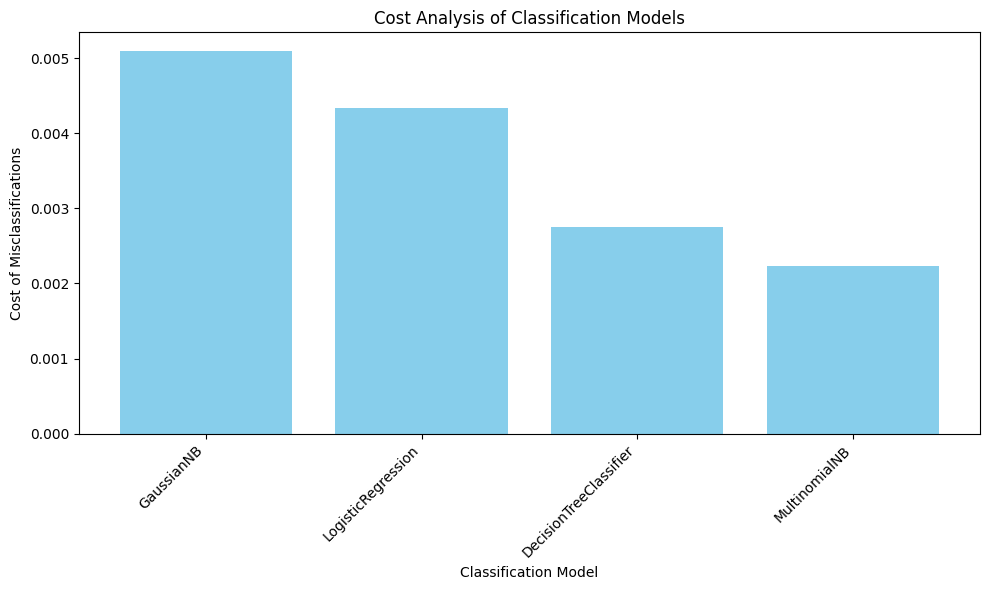

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(models_cost.keys(), models_cost.values(), color='skyblue')
plt.xlabel('Classification Model')
plt.ylabel('Cost of Misclassifications')
plt.title('Cost Analysis of Classification Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()